In [2]:
import gpxpy
import gpxpy.gpx
import numpy as np
import haversine as hs


import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False


In [3]:
file_path = 'data/gpx/paganella-bike-park.gpx'
with open(file_path, 'r') as gpx_file:
    gpx = gpxpy.parse(gpx_file)

# * Get the number of data points (number of times geolocation was taken):
gpx.get_track_points_no()

10578

In [4]:
# Get the number of meters of uphil and downhil ride
# It's a roundtrip, so the numbers are almost identical
gpx.get_uphill_downhill()


UphillDownhill(uphill=3551.394399999996, downhill=4146.4083999999975)

In [5]:
gpx.tracks[0]


GPXTrack(name='Paganella bike park', segments=[GPXTrackSegment(points=[...])])

In [6]:
gpx.tracks[0].segments[0].points[:10]


[GPXTrackPoint(46.156385, 10.955038, elevation=1524.084, time=datetime.datetime(2022, 10, 2, 9, 46, 55, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(46.156384, 10.95504, elevation=1521.207, time=datetime.datetime(2022, 10, 2, 9, 46, 56, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(46.156368, 10.955054, elevation=1521.017, time=datetime.datetime(2022, 10, 2, 9, 46, 59, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(46.156375, 10.95506, elevation=1521.209, time=datetime.datetime(2022, 10, 2, 9, 47, 4, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(46.156371, 10.955066, elevation=1521.279, time=datetime.datetime(2022, 10, 2, 9, 47, 6, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(46.156365, 10.955067, elevation=1521.259, time=datetime.datetime(2022, 10, 2, 9, 47, 7, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(46.156363, 10.955067, elevation=1521.293, time=datetime.datetime(2022, 10, 2, 9, 47, 8, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(46.156357, 10.955098, elevation=1521.269, time=datetime.datetime(2022, 10, 2, 9, 47, 11, tzinfo

In [7]:
route_info = []

for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            route_info.append({
                'time': point.time,
                'latitude': point.latitude,
                'longitude': point.longitude,
                'elevation': point.elevation
            })
route_info[:3]


[{'time': datetime.datetime(2022, 10, 2, 9, 46, 55, tzinfo=SimpleTZ("Z")),
  'latitude': 46.156385,
  'longitude': 10.955038,
  'elevation': 1524.084},
 {'time': datetime.datetime(2022, 10, 2, 9, 46, 56, tzinfo=SimpleTZ("Z")),
  'latitude': 46.156384,
  'longitude': 10.95504,
  'elevation': 1521.207},
 {'time': datetime.datetime(2022, 10, 2, 9, 46, 59, tzinfo=SimpleTZ("Z")),
  'latitude': 46.156368,
  'longitude': 10.955054,
  'elevation': 1521.017}]

In [8]:
route_df = pd.DataFrame(route_info)
route_df.head()


,time,latitude,longitude,elevation
0,2022-10-02 09:46:55+00:00,46.156385,10.955038,1524.084
1,2022-10-02 09:46:56+00:00,46.156384,10.955040,1521.207
2,2022-10-02 09:46:59+00:00,46.156368,10.955054,1521.017
3,2022-10-02 09:47:04+00:00,46.156375,10.955060,1521.209
4,2022-10-02 09:47:06+00:00,46.156371,10.955066,1521.279


##### 3- Calculate elevation difference


In [10]:
route_df['elevation_diff'] = route_df['elevation'].diff()

route_df.head()


,time,latitude,longitude,elevation,elevation_diff
0,2022-10-02 09:46:55+00:00,46.156385,10.955038,1524.084,NaN
1,2022-10-02 09:46:56+00:00,46.156384,10.955040,1521.207,-2.877
2,2022-10-02 09:46:59+00:00,46.156368,10.955054,1521.017,-0.190
3,2022-10-02 09:47:04+00:00,46.156375,10.955060,1521.209,0.192
4,2022-10-02 09:47:06+00:00,46.156371,10.955066,1521.279,0.070


In [11]:
def haversine_distance(lat1, lon1, lat2, lon2) -> float:
    distance = hs.haversine(
        point1=(lat1, lon1),
        point2=(lat2, lon2),
        unit=hs.Unit.METERS
    )
    return np.round(distance, 2)


Calculate the distances between all data points


In [45]:
haversine_distance(
    lat1=route_df.iloc[0]['latitude'],
    lon1=route_df.iloc[0]['longitude'],
    lat2=route_df.iloc[1]['latitude'],
    lon2=route_df.iloc[1]['longitude']
)

distances = [np.nan]
speed = [np.nan]

for i in range(1, len(route_df)):
    distances.append(haversine_distance(
        lat1=route_df.iloc[i - 1]['latitude'],
        lon1=route_df.iloc[i - 1]['longitude'],
        lat2=route_df.iloc[i]['latitude'],
        lon2=route_df.iloc[i]['longitude']
    ))

    # #* speed
    time_diff = (route_df.iloc[i].time - route_df.iloc[i - 1].time).seconds
    speed.append(distances[i]/time_diff)


route_df['distance'] = distances
route_df['speed'] = speed
route_df

,time,latitude,longitude,elevation,elevation_diff,distance,speed,cum_elevation,cum_distance,counter
0,2022-10-02 09:46:55+00:00,46.156385,10.955038,1524.084,0.000,NaN,NaN,0.000,0.00000,0
1,2022-10-02 09:46:56+00:00,46.156384,10.955040,1521.207,-2.877,0.19,0.190000,-2.877,0.00019,0
2,2022-10-02 09:46:59+00:00,46.156368,10.955054,1521.017,-0.190,2.08,0.693333,-3.067,0.00227,0
3,2022-10-02 09:47:04+00:00,46.156375,10.955060,1521.209,0.192,0.91,0.182000,-2.875,0.00318,0
4,2022-10-02 09:47:06+00:00,46.156371,10.955066,1521.279,0.070,0.64,0.320000,-2.805,0.00382,0
...,...,...,...,...,...,...,...,...,...,...
10573,2022-10-02 16:57:54+00:00,46.144351,10.965109,928.883,0.274,0.68,0.340000,-595.201,57.21197,5
10574,2022-10-02 16:57:56+00:00,46.144371,10.965139,928.873,-0.010,3.21,1.605000,-595.211,57.21518,5
10575,2022-10-02 16:57:59+00:00,46.144381,10.965139,928.897,0.024,1.11,0.370000,-595.187,57.21629,5
10576,2022-10-02 16:58:01+00:00,46.144385,10.965150,929.043,0.146,0.96,0.480000,-595.041,57.21725,5


In [13]:
print('Max altitude:', (route_df['elevation']).max(), 'm')
# print('v', route_df[route_df['elevation_diff'] <= 0]['elevation_diff'].sum())

print('Total distance:', route_df['distance'].sum() / 1000, 'km')

Max altitude: 1785.289 m
Total distance: 57.21757000000001 km


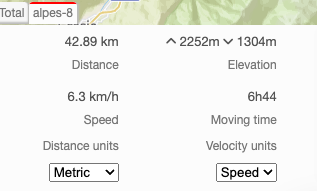

proof for <ins>alpes-8.gpx</ins>


##### Visualize the Elevation profile


In [46]:
route_df['cum_elevation'] = route_df['elevation_diff'].cumsum()
route_df['cum_distance'] = route_df['distance'].cumsum()/1e3

route_df = route_df.fillna(0)  # replace NANs with zero
route_df

,time,latitude,longitude,elevation,elevation_diff,distance,speed,cum_elevation,cum_distance,counter
0,2022-10-02 09:46:55+00:00,46.156385,10.955038,1524.084,0.000,0.00,0.000000,0.000,0.00000,0
1,2022-10-02 09:46:56+00:00,46.156384,10.955040,1521.207,-2.877,0.19,0.190000,-2.877,0.00019,0
2,2022-10-02 09:46:59+00:00,46.156368,10.955054,1521.017,-0.190,2.08,0.693333,-3.067,0.00227,0
3,2022-10-02 09:47:04+00:00,46.156375,10.955060,1521.209,0.192,0.91,0.182000,-2.875,0.00318,0
4,2022-10-02 09:47:06+00:00,46.156371,10.955066,1521.279,0.070,0.64,0.320000,-2.805,0.00382,0
...,...,...,...,...,...,...,...,...,...,...
10573,2022-10-02 16:57:54+00:00,46.144351,10.965109,928.883,0.274,0.68,0.340000,-595.201,57.21197,5
10574,2022-10-02 16:57:56+00:00,46.144371,10.965139,928.873,-0.010,3.21,1.605000,-595.211,57.21518,5
10575,2022-10-02 16:57:59+00:00,46.144381,10.965139,928.897,0.024,1.11,0.370000,-595.187,57.21629,5
10576,2022-10-02 16:58:01+00:00,46.144385,10.965150,929.043,0.146,0.96,0.480000,-595.041,57.21725,5


In [51]:
def plot_route(df):
    plt.figure(figsize=(19, 3))
    plt.plot(df['cum_distance'] / 1000,
             df['elevation'], color='#101010', lw=3)
    plt.title('Route elevation profile', size=20)
    plt.xlabel('Distance in km', size=14)
    plt.ylabel('Elevation in meters', size=14)
    # plt.savefig('fig.jpg', dpi=300, bbox_inches='tight') # save the figure

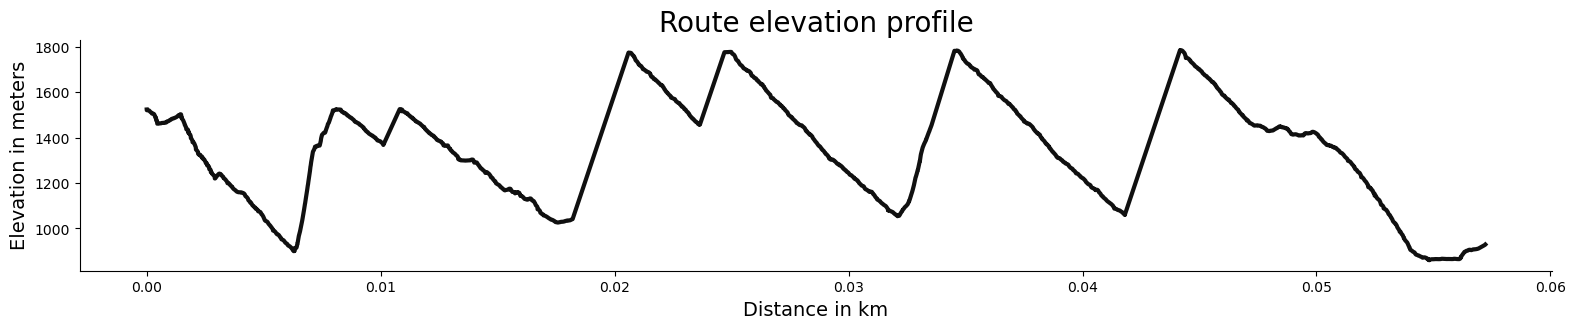

In [55]:
plot_route(route_df)


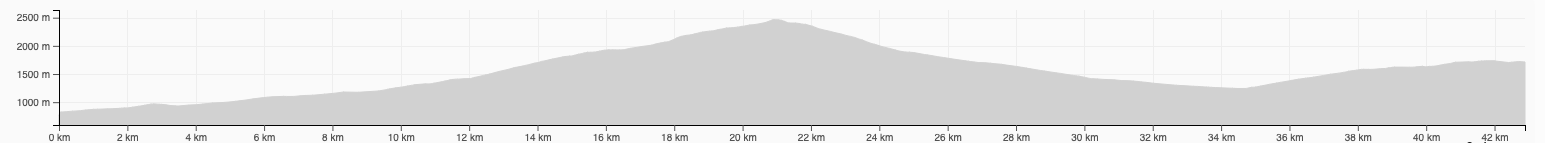


In [40]:
print('------------------speed---------------')
print(route_df['speed'].describe())
print('------------------distance---------------')
print(route_df['distance'].describe())


------------------speed---------------
count    10578.000000
mean         3.926664
std          3.282520
min          0.000000
25%          1.500000
50%          3.075000
75%          6.204583
max        127.270000
Name: speed, dtype: float64
------------------distance---------------
count    10578.000000
mean         5.409110
std         36.270568
min          0.000000
25%          1.600000
50%          3.520000
75%          6.920000
max       2387.440000
Name: distance, dtype: float64


In [26]:
counter = 0
route_df['counter'] = 0  # ? set the counter column to zero
for i in range(len(route_df)):
    # if route_df['elevation_diff'][i] < 1:
    #     continue
    if route_df['elevation_diff'][i] > 100:
        counter += 1
        print(i)
    route_df['counter'][i] = counter

    # print(route_df['elevation'][i])
    # print('i',i)

# save the new df to csv
route_df.to_csv('./data/csv/' + file_path[9:-4] + '.csv', index=False)
counter

/var/folders/61/dby95pn55tqdzyrv31gppc7c0000gn/T/ipykernel_8769/4120392931.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route_df['counter'][i] = counter


3171
4671
5165
6624
7734


5

In [25]:
# for i in range(1,len(route_df)):
#     time_diff = (route_df.iloc[i].time - route_df.iloc[i - 1].time).seconds/60
# print(time_diff)

total_time_in_min = (
    route_df.iloc[len(route_df)-1].time - route_df.iloc[0].time).seconds/60
total_time_in_min

431.1166666666667

In [27]:
# save the new df to csv
route_df.to_csv('./data/csv/' + file_path[9:-4] + '.csv', index=True)